<a href="https://colab.research.google.com/github/Kvaibhav1997/Customer_data/blob/main/Customer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [215]:
from google.colab import files
uploaded=files.upload()

Saving customer-data.csv to customer-data (3).csv


In [244]:
df=pd.read_csv("customer-data.csv")

In [245]:
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [246]:
df.drop(['id', 'postal_code'], axis=1,inplace=True)

In [247]:
#Q1. What proportion of customers with a credit score below 0.2 made a claim in the last year?
data1=df[df['credit_score']>0.2].value_counts()
print(data1)

age    gender  race      driving_experience  education    income         credit_score  vehicle_ownership  vehicle_year  married  children  annual_mileage  vehicle_type  speeding_violations  DUIs  past_accidents  outcome
65+    male    minority  30y+                university   upper class    0.746672      True               after 2015    False    True      17000.0         sedan         1                    1     2               False      1
26-39  female  minority  10-19y              high school  middle class   0.547843      True               before 2015   False    False     15000.0         sedan         0                    0     1               True       1
                         0-9y                none         working class  0.661762      False              before 2015   False    False     12000.0         sedan         0                    0     0               True       1
                                             university   middle class   0.535840      True              

In [248]:
#Q2. What is the average number of speeding violations among customers with driving experience between 20 and 29 years (inclusive)?
data2=df[df['driving_experience']=='20-29y']

print("The average no. of speeding violation is % s."% data2['speeding_violations'].mean())

The average no. of speeding violation is 2.734308636149127.


In [249]:
#Q3. What if you consider only the people in this group who drive a sports car?
sports_car_driver=df[df['vehicle_type']=='sports car']
print(sports_car_driver)

        age  gender      race  ... DUIs past_accidents outcome
25    26-39  female  majority  ...    0              0   False
38      65+    male  majority  ...    0              5   False
45    40-64    male  majority  ...    0              4   False
89    16-25    male  majority  ...    0              0    True
113   16-25    male  majority  ...    0              0    True
...     ...     ...       ...  ...  ...            ...     ...
9884  26-39  female  majority  ...    0              0    True
9932  16-25  female  majority  ...    0              0   False
9943    65+    male  majority  ...    0              5   False
9958  40-64    male  majority  ...    2              4   False
9972  26-39  female  majority  ...    0              1   False

[477 rows x 17 columns]


In [250]:
#Q4. What is the standard deviation in annual mileage?
print("Standard Deviation of Annual Mileage is % s "% (np.std(df['annual_mileage'])))

Standard Deviation of Annual Mileage is 2818.278688843016 


In [251]:
df.shape

(10000, 17)

In [252]:
df.isnull().sum()

age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [253]:
df.dropna(axis=0, inplace=True)

In [254]:
le=LabelEncoder()

In [255]:
df.dtypes

age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership         bool
vehicle_year            object
married                   bool
children                  bool
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
DUIs                     int64
past_accidents           int64
outcome                   bool
dtype: object

In [256]:
df['age']=le.fit_transform(df['age'])
df['gender']=le.fit_transform(df['gender'])
df['race']=le.fit_transform(df['race'])
df['driving_experience']=le.fit_transform(df['driving_experience'])
df['education']=le.fit_transform(df['education'])
df['income']=le.fit_transform(df['income'])
df['vehicle_year']=le.fit_transform(df['vehicle_year'])
df['vehicle_type']=le.fit_transform(df['vehicle_type'])

In [257]:
df['children'].replace({True:1,False:0}, inplace=True)
df['married'].replace({True:1,False:0}, inplace=True)
df['outcome'].replace({True:1,False:0}, inplace=True)
df['vehicle_ownership'].replace({True:1,False:0}, inplace=True)

In [258]:
x=df.drop(['outcome'], axis=1)
y=df['outcome']

In [259]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2)

In [310]:
#RANDOM FOREST CLASSIFIER
rfc=RandomForestClassifier(n_estimators=49)

In [311]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=49,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [312]:
ypred=rfc.predict(xtest)

In [313]:

print("Classification Report is:\n",classification_report(ytest,ypred))
print("Confusion Matrix:\n",confusion_matrix(ytest,ypred))
print("Training Score:\n",rfc.score(xtrain,ytrain)*100)
print("Root Mean Squared Error:\n",sqrt(mean_squared_error(ytest,ypred)))
print("R2 score is:\n",r2_score(ytest,ypred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1125
           1       0.74      0.67      0.71       505

    accuracy                           0.83      1630
   macro avg       0.80      0.78      0.79      1630
weighted avg       0.82      0.83      0.82      1630

Confusion Matrix:
 [[1008  117]
 [ 165  340]]
Training Score:
 99.95398067188219
Root Mean Squared Error:
 0.41594006175087916
R2 score is:
 0.19091749174917494


In [314]:
acc=accuracy_score(ytest,ypred)
acc

0.8269938650306748

In [315]:
k_range = range(1, 50)
values = []
for k in k_range:
    rfc=RandomForestClassifier(n_estimators=k)
    rfc.fit(xtrain, ytrain)
    ypred = rfc.predict(xtest)
    values.append(accuracy_score(ytest,ypred))
print(values)

[0.758282208588957, 0.7858895705521473, 0.803680981595092, 0.8049079754601227, 0.80920245398773, 0.7993865030674847, 0.8104294478527607, 0.8128834355828221, 0.8245398773006135, 0.8104294478527607, 0.8220858895705522, 0.8171779141104294, 0.8239263803680982, 0.8184049079754602, 0.8312883435582822, 0.8257668711656442, 0.8239263803680982, 0.8374233128834356, 0.8300613496932515, 0.8233128834355828, 0.8251533742331288, 0.8245398773006135, 0.8319018404907975, 0.8226993865030675, 0.8300613496932515, 0.8233128834355828, 0.8319018404907975, 0.8257668711656442, 0.8251533742331288, 0.8214723926380368, 0.8294478527607362, 0.8251533742331288, 0.8233128834355828, 0.8331288343558282, 0.8306748466257668, 0.8276073619631902, 0.8245398773006135, 0.8276073619631902, 0.8276073619631902, 0.8343558282208589, 0.8349693251533742, 0.8319018404907975, 0.8251533742331288, 0.8294478527607362, 0.8343558282208589, 0.8288343558282208, 0.8245398773006135, 0.8361963190184049, 0.8343558282208589]


Text(0, 0.5, 'Testing Accuracy')

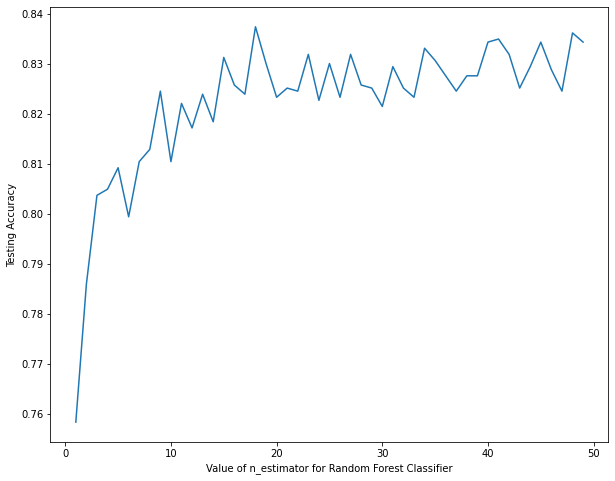

In [317]:
plt.figure(figsize=(10,8))
plt.plot(k_range, values)

plt.xlabel('Value of n_estimator for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [265]:
#Standard Scaler
stdc=StandardScaler()
x_train= stdc.fit_transform(xtrain)    
x_test= stdc.transform(xtest)  

In [304]:
#KNeighbour CLassifier
knn=KNeighborsClassifier(n_neighbors=30, metric='minkowski', p=2)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [305]:
ypred1=knn.predict(xtest)

In [306]:
cm= confusion_matrix(ytest, ypred1)  
cm

array([[1001,  124],
       [ 197,  308]])

In [307]:
sqrt(mean_squared_error(ytest,ypred1))
print(knn.score(xtrain,ytrain)*100)

80.84061972695199


In [308]:
acc=accuracy_score(ytest,ypred1)
acc

0.8030674846625767

In [309]:
k_range = range(1, 31)
values = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    y_pred = knn.predict(xtest)
    values.append(knn.score(xtest, ytest))
print(values)

[0.7521472392638037, 0.7815950920245399, 0.7889570552147239, 0.7926380368098159, 0.7975460122699386, 0.8, 0.801840490797546, 0.801840490797546, 0.8042944785276074, 0.8006134969325154, 0.8042944785276074, 0.8098159509202454, 0.8067484662576687, 0.8079754601226994, 0.803680981595092, 0.805521472392638, 0.803680981595092, 0.8085889570552147, 0.807361963190184, 0.8116564417177914, 0.8042944785276074, 0.8067484662576687, 0.805521472392638, 0.8042944785276074, 0.8, 0.8012269938650307, 0.8024539877300614, 0.805521472392638, 0.8042944785276074, 0.8030674846625767]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Testing Accuracy')

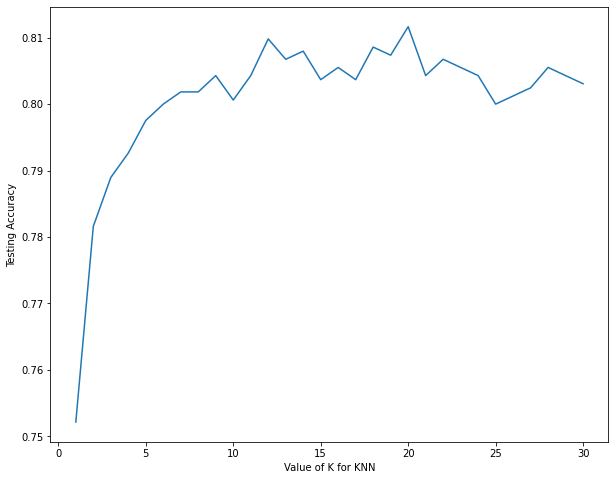

In [299]:
plt.figure(figsize=(10,8))
sns.lineplot(k_range, values)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')